In [1]:
import pandas as pd
import pandas_datareader as web
import matplotlib.pyplot as plt
import numpy as np

In [161]:
data = web.DataReader('AAPL', 'iex', start = '2014-01-01')
data

5y


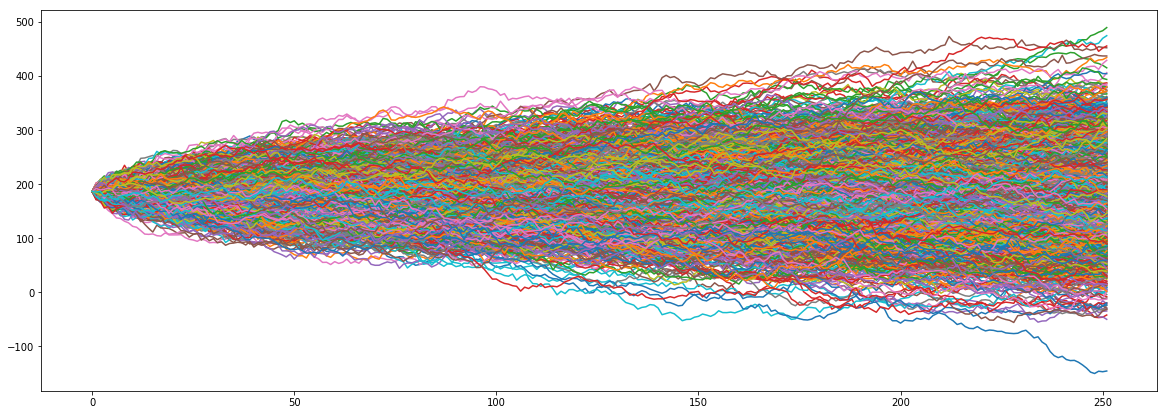

In [160]:
num_walks = 2000


price_dict_list = []
for x in range(num_walks):
    prices = {}
    price = last_price
    
    for y in range(252):
        if len(prices) >0:
            price =price +5*np.random.normal()
            prices[y] = price
        else:
            prices[y] = price
    price_dict_list.append(prices)
plt.figure(figsize = (20,7))
for x in price_dict_list:
    
    plt.plot(x.keys(), x.values())

In [35]:
class BinomialDist:
    
    def __init__(self, starting_value, probability, num_iters, percent_change):
        
        self.starting_value = starting_value
        self.probability = probability
        self.num_iters = num_iters
        self.percent_change = percent_change
    
    def create_tree(self):
        tree_list = []
        
        for x in range(1000):
            tree = {}
            for y in range(self.num_iters):
                r_move = np.random.binomial(1, self.probability)
                
                if r_move == 0:
                    r_move = 1 - self.percent_change
                elif r_move == 1:
                    r_move = 1 + self.percent_change
                
                if len(tree) == 0:
                    tree[y] = self.starting_value
                elif len(tree) == 1:
                    tree[y] = self.starting_value * r_move
                elif len(tree) >1:
                    tree[y] = tree[y-1]*r_move
            tree_list.append(tree)
        return tree_list
    
    def plot_tree(self):
        
        tree_list = self.create_tree()
        plt.figure(figsize = (20,10))
        for x in tree_list:
            plt.plot(x.keys(), x.values(), alpha = .038)
        
        
        
    
    

In [38]:
option_tree = BinomialDist(20, .72, 50, .01)

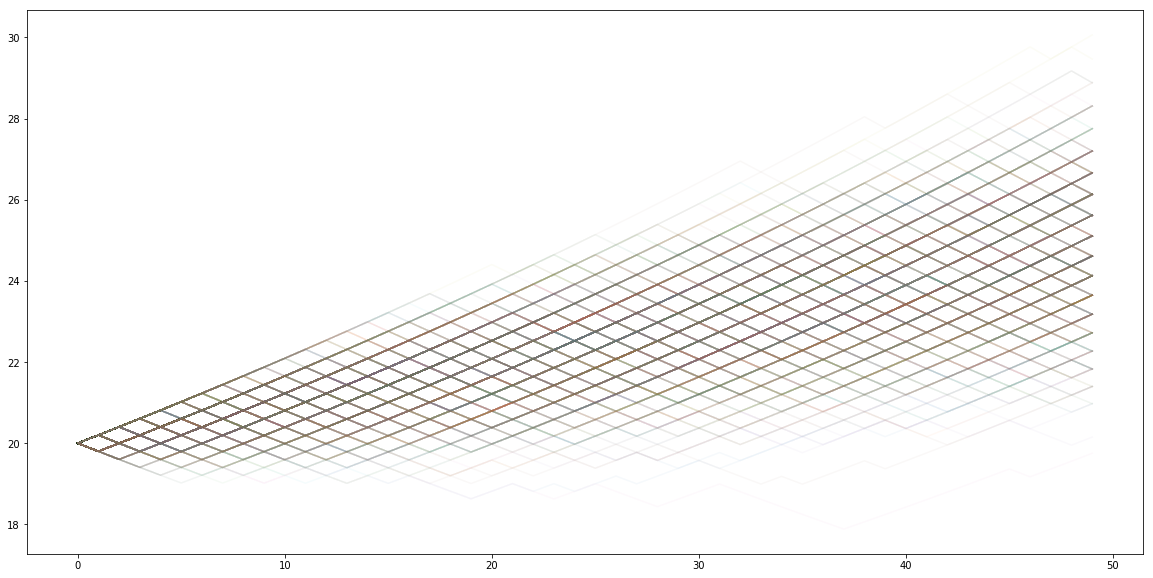

In [39]:
option_tree.plot_tree()

In [65]:
class BayesRule:
    
    """CALCULATING (A|B) knowing (B|A)
    PARAMETERS TO ENTER
        1.) p(B|A)
        2.) p(A)
        3.) p(B|Ac)
        4.) p(Ac)
        
        EXAMPLE::
            What is the probability that an individual with a job knows how to code in Python.
            lets use 
            A = {percentage of people who have a job} = .75
            B|A = {percentage of people who know how to code in python|have a job} = .75
            Ac = 1 - A
            B|Ac = {percentage of people who know how to code in python|not having a job} = .25
            
            A|B = p(B|A)*p(A)/(p(B|A)*p(A) + p(B|Ac)*p(Ac))
            
            THE PROBABILITY OF SOMEONE KNOWING HOW TO CODE IN PYTHON GIVEN THAT THEY HAVE A JOB IS 90%
            
            
            
    
    """
    
    def __init__(self, pb_a, p_a, pb_ac):
        self.pb_a = pb_a
        self.p_a = p_a
        self.pb_ac = pb_ac
        self.p_ac = 1 -p_a
        print('BAYES ANALYSIS INITIATED')
    
    def calc_prob(self):
        top = self.pb_a * self.p_a
        bayes_equation = (top)/(top + self.pb_ac*self.p_ac)
        print('PROB OF A|B IS:')
        return bayes_equation

In [66]:
prob_knowing_python = BayesRule(.75, .75, .25)

BAYES ANALYSIS INITIATED


In [67]:
prob_knowing_python.calc_prob()

PROB OF A|B IS:


0.9